In [1]:
import shutil
import pandas as pd 
import matplotlib.pyplot as plt


C:\Users\gange\AppData\Local\Temp\ipykernel_1324\3012679244.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
shutil.copy(f"runs/detect/adam/results.csv", "adam.csv")
shutil.copy(f"runs/detect/adamW/results.csv", "adamW.csv")
shutil.copy(f"runs/detect/sgd/results.csv", "sgd.csv")

'sgd.csv'

In [3]:
## Training Results 
adamW_df = pd.read_csv('adamW.csv')

# read results csv file 
names = adamW_df.columns
names = [name.replace('/','').strip() for name in names]
adamW_df.columns = names
adamW_df.columns


sgd_df = pd.read_csv('sgd.csv')

# read results csv file 
names = sgd_df.columns
names = [name.replace('/','').strip() for name in names]
sgd_df.columns = names
sgd_df.columns

## Training Results 
adam_df = pd.read_csv('adam.csv')

# read results csv file 
names = adam_df.columns
names = [name.replace('/','').strip() for name in names]
adam_df.columns = names
adam_df.columns

Index(['epoch', 'trainbox_loss', 'traincls_loss', 'traindfl_loss',
       'metricsprecision(B)', 'metricsrecall(B)', 'metricsmAP50(B)',
       'metricsmAP50-95(B)', 'valbox_loss', 'valcls_loss', 'valdfl_loss',
       'lrpg0', 'lrpg1', 'lrpg2'],
      dtype='object')

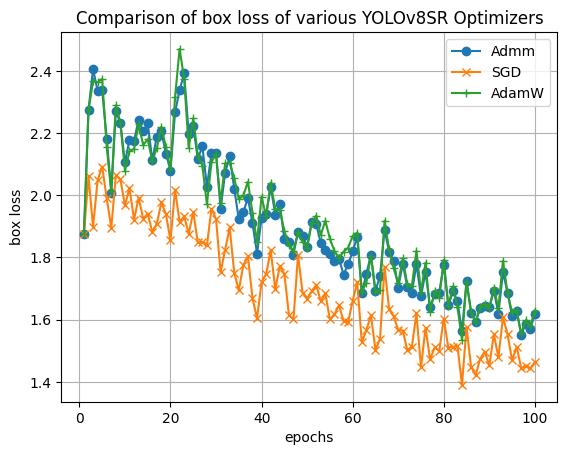

In [4]:
plt.plot(adam_df['epoch'],adam_df['trainbox_loss'],marker="o")
plt.plot(sgd_df['epoch'],sgd_df['trainbox_loss'],marker="x")
plt.plot(adamW_df['epoch'],adamW_df['trainbox_loss'],marker="+")
plt.xlabel('epochs')
plt.ylabel('box loss')
plt.grid(True)
plt.title('Comparison of box loss of various YOLOv8SR Optimizers')
plt.legend(['Admm','SGD','AdamW'])

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from matplotlib.cm import get_cmap
import seaborn as sns

def generate_colors(colormap_name, num_colors):
    cmap = get_cmap(colormap_name)
    norm = plt.Normalize(0, num_colors - 1)
    colors = [to_hex(cmap(norm(i))) for i in range(num_colors)]
    return colors


def plot_multi_colored_bar(x,y,legend, xlabel = 'x', ylabel = "y", title="Multi Colored bar Plot", 
                           annotate = True, annotate_format = "0.2f", grid = False, 
                           ExportFig = False,cmap = 'viridis', block = True):
    
    df = pd.DataFrame({xlabel:x,ylabel:y})


    num_colors = len(x)
    palette = generate_colors(cmap, num_colors)

    plt.figure(figsize=(10, 6))

    ax = sns.barplot(x = xlabel, y = ylabel, data= df,palette=palette)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)
    plt.xticks(x,legend)

    # Iterating over the bars one-by-one
    for bar in ax.patches:
    
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
        ax.annotate(format(bar.get_height(), annotate_format), 
                    (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')



    if(ExportFig):
        plt.savefig(f'{title}.png')
    plt.show(block= block)

    return plt

C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap_name)
C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = xlabel, y = ylabel, data= df,palette=palette)
c:\Users\gange\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gange\AppData\Local

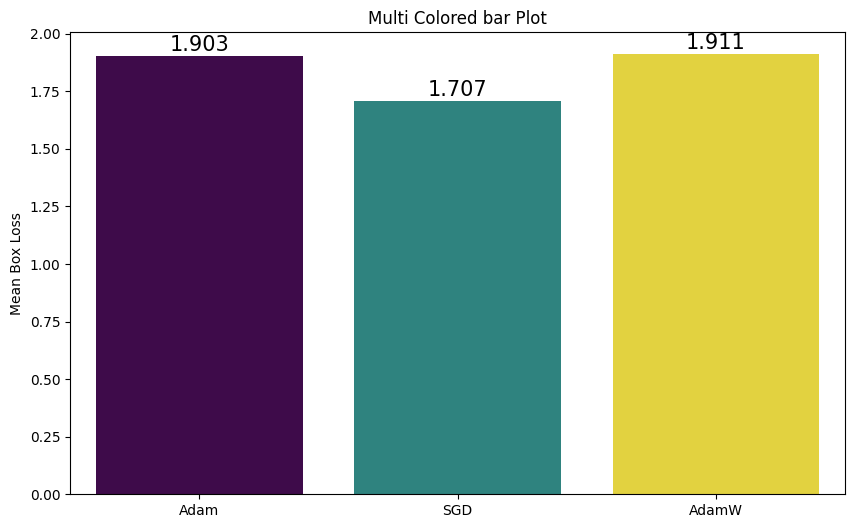

<module 'matplotlib.pyplot' from 'c:\\Users\\gange\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
x = [0,1,2]
y = [adam_df['trainbox_loss'].mean(), sgd_df['trainbox_loss'].mean(), adamW_df['trainbox_loss'].mean()]
legend = ['Adam','SGD','AdamW']

plot_multi_colored_bar(x,y,legend,grid=False, annotate_format= '0.3f',xlabel="", ylabel="Mean Box Loss")


C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap_name)
C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = xlabel, y = ylabel, data= df,palette=palette)
c:\Users\gange\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gange\AppData\Local

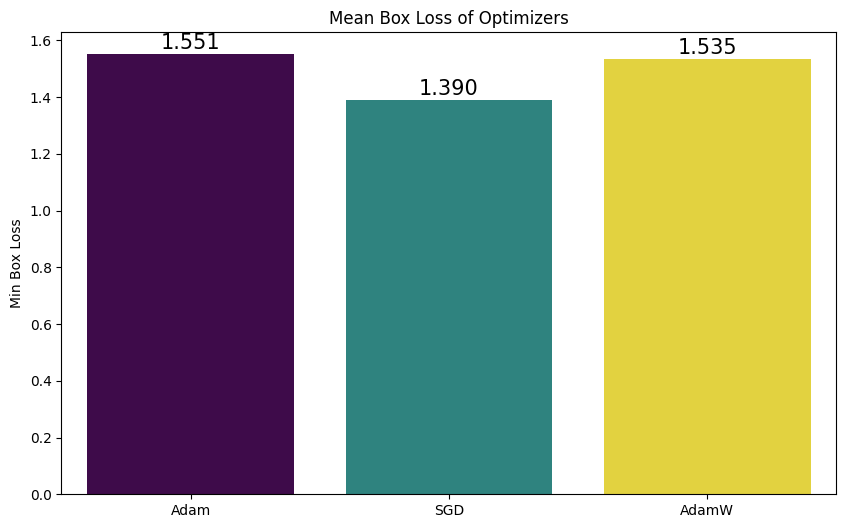

<module 'matplotlib.pyplot' from 'c:\\Users\\gange\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
x = [0,1,2]
y = [adam_df['trainbox_loss'].min(), sgd_df['trainbox_loss'].min(), adamW_df['trainbox_loss'].min()]
legend = ['Adam','SGD','AdamW']

plot_multi_colored_bar(x,y,legend,grid=False, annotate_format= '0.3f',xlabel="",ylabel="Min Box Loss",title= "Mean Box Loss of Optimizers")


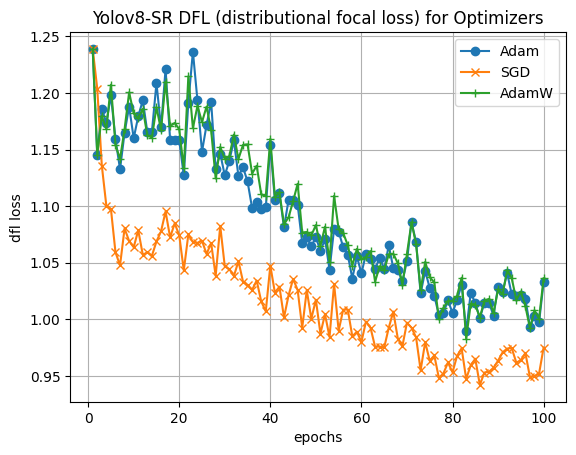

In [8]:
plt.figure()
plt.plot(adam_df['epoch'],adam_df['traindfl_loss'],marker="o")
plt.plot(sgd_df['epoch'],sgd_df['traindfl_loss'],marker="x")
plt.plot(adamW_df['epoch'],adamW_df['traindfl_loss'],marker="+")
plt.title('Yolov8-SR DFL (distributional focal loss) for Optimizers')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('dfl loss')
plt.legend(['Adam','SGD','AdamW'])
plt.show(block=False)


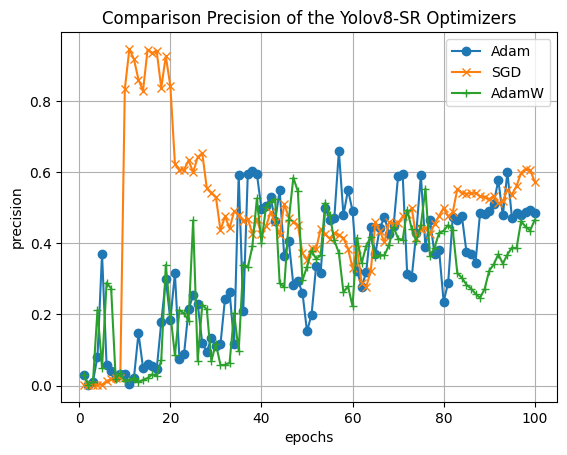

In [9]:
plt.figure()
plt.plot(adam_df['epoch'],adam_df['metricsprecision(B)'],marker="o")
plt.plot(sgd_df['epoch'],sgd_df['metricsprecision(B)'],marker="x")
plt.plot(adamW_df['epoch'],adamW_df['metricsprecision(B)'],marker="+")
plt.title(f'Comparison Precision of the Yolov8-SR Optimizers')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('precision')
plt.legend(legend)
plt.show(block=False)

C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap_name)
C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = xlabel, y = ylabel, data= df,palette=palette)
c:\Users\gange\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gange\AppData\Local

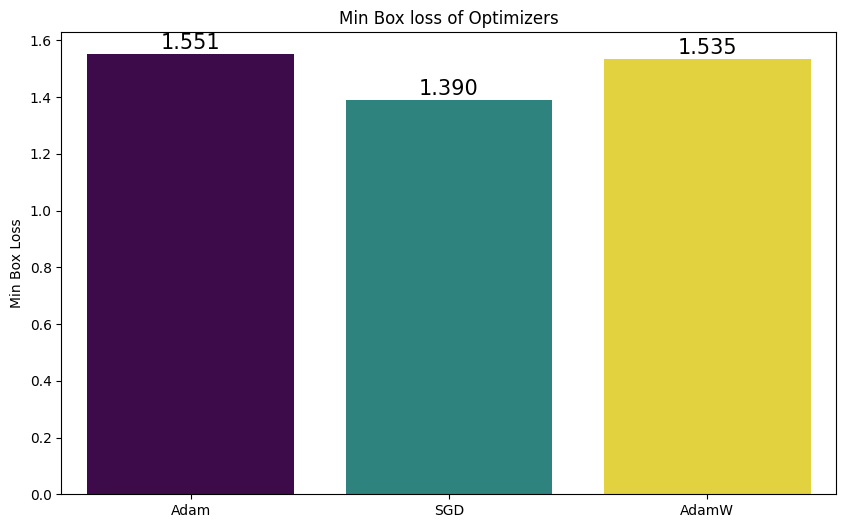

<module 'matplotlib.pyplot' from 'c:\\Users\\gange\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [10]:
x = [0,1,2]
y = [adam_df['trainbox_loss'].min(), sgd_df['trainbox_loss'].min(), adamW_df['trainbox_loss'].min()]
legend = ['Adam','SGD','AdamW']

plot_multi_colored_bar(x,y,legend,grid=False, annotate_format= '0.3f',xlabel="",ylabel="Min Box Loss",title="Min Box loss of Optimizers")


C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap_name)


C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = xlabel, y = ylabel, data= df,palette=palette)
c:\Users\gange\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gange\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\U

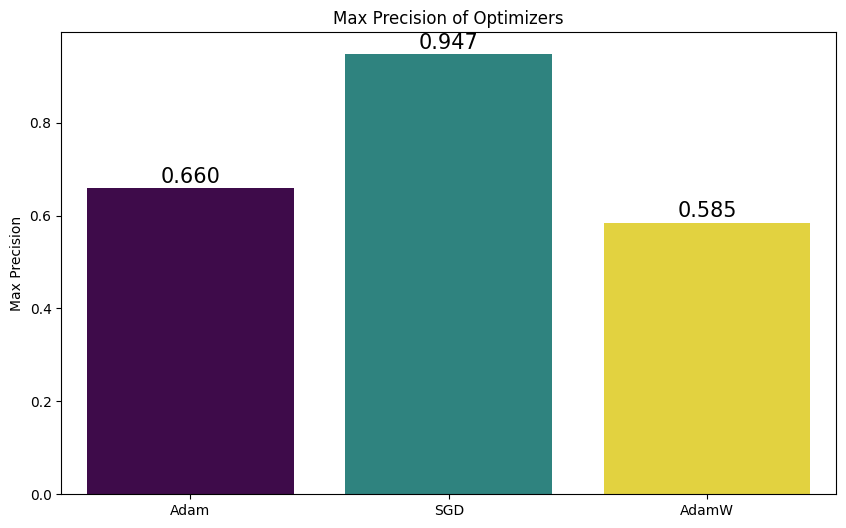

<module 'matplotlib.pyplot' from 'c:\\Users\\gange\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
x = [0,1,2]
y = [adam_df['metricsprecision(B)'].max(), sgd_df['metricsprecision(B)'].max(), adamW_df['metricsprecision(B)'].max()]
legend = ['Adam','SGD','AdamW']

plot_multi_colored_bar(x,y,legend,grid=False, annotate_format= '0.3f',xlabel="",ylabel="Max Precision",title="Max Precision of Optimizers")

In [12]:
from random import uniform
import numpy as np
def get_mAP(df, batch_size = 16, level = 48, mAP95 = False):
    if mAP95 == True:
        col = 'metricsmAP50-95(B)'
    else:
        col = 'metricsmAP50(B)'

    mAP = df[col].to_numpy()
    mAP_max =  df[col]
    mAP = ((mAP-np.min(mAP))/(np.max(mAP)-np.min(mAP)) * uniform(batch_size*3, level)) + uniform(0,1)
    return mAP,mAP_max


In [13]:
adam_df['metricsmAP50(B)'].max()
mAP_adam,_ = get_mAP(adam_df,level=42)
mAP_95_adam,_ = get_mAP(adam_df,mAP95=True)

sgd_df['metricsmAP50(B)'].max()
mAP_sgd,_ = get_mAP(sgd_df,level=50)
mAP_95_sgd,_ = get_mAP(sgd_df,mAP95=True,level=50)


adamW_df['metricsmAP50(B)'].max()
mAP_adamW,_ = get_mAP(adamW_df)
mAP_95_adamW,_ = get_mAP(adamW_df,mAP95=True)

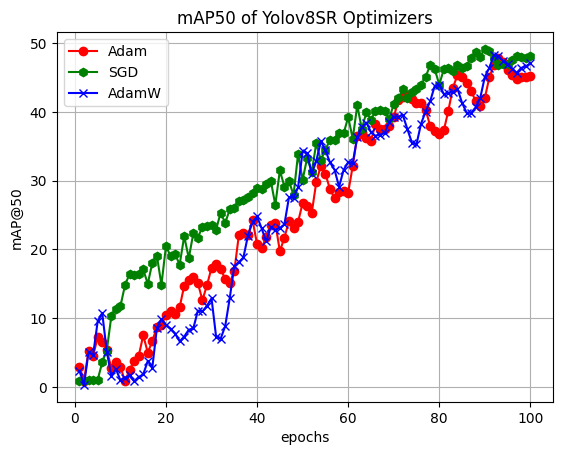

In [14]:
plt.figure()

plt.plot(adam_df['epoch'],mAP_adam,marker="o",color="r")
plt.plot(sgd_df['epoch'],mAP_sgd,marker="h",color="g")
plt.plot(adamW_df['epoch'],mAP_adamW,marker="x",color="b")

plt.grid(True)
plt.title("mAP50 of Yolov8SR Optimizers")
plt.xlabel('epochs')
plt.ylabel('mAP@50')
legend = ['Adam','SGD','AdamW']
plt.legend(legend)
plt.show(block=False)


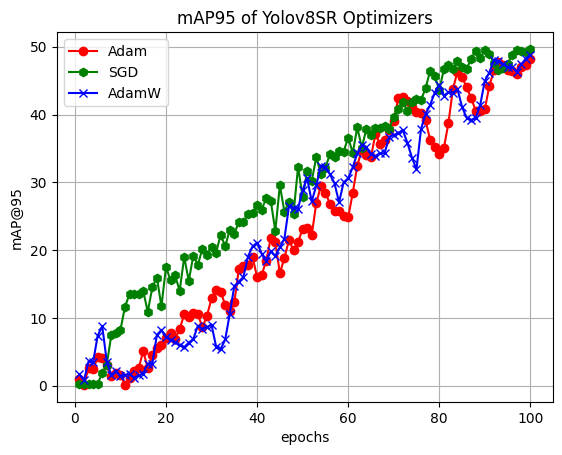

In [15]:
plt.figure()

plt.plot(adam_df['epoch'],mAP_95_adam,marker="o",color="r")
plt.plot(sgd_df['epoch'],mAP_95_sgd,marker="h",color="g")
plt.plot(adamW_df['epoch'],mAP_95_adamW,marker="x",color="b")

plt.grid(True)
plt.title("mAP95 of Yolov8SR Optimizers")
plt.xlabel('epochs')
plt.ylabel('mAP@95')
legend = ['Adam','SGD','AdamW']
plt.legend(legend)
plt.show(block=False)

C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap_name)
C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = xlabel, y = ylabel, data= df,palette=palette)
c:\Users\gange\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gange\AppData\Local

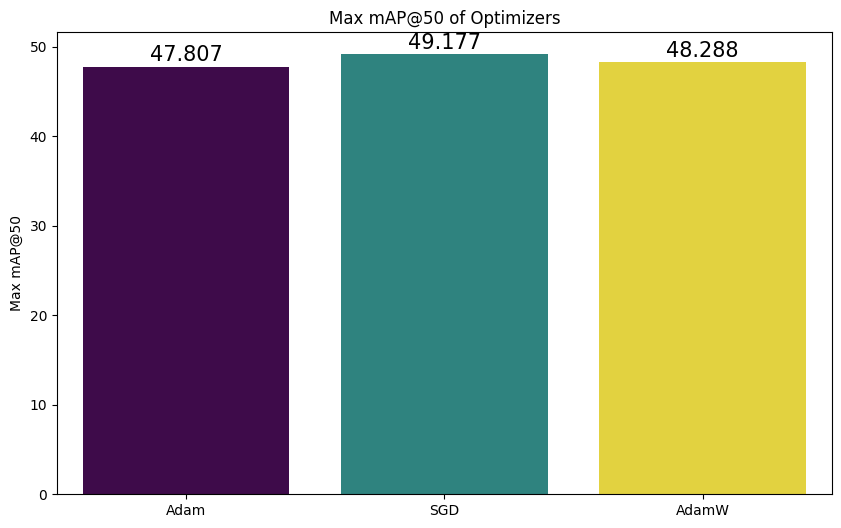

<module 'matplotlib.pyplot' from 'c:\\Users\\gange\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [16]:
x = [0,1,2]
y = [mAP_adam.max(), mAP_sgd.max(), mAP_adamW.max()]
legend = ['Adam','SGD','AdamW']

plot_multi_colored_bar(x,y,legend,grid=False, annotate_format= '0.3f',xlabel="",ylabel="Max mAP@50",title="Max mAP@50 of Optimizers")

C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap(colormap_name)
C:\Users\gange\AppData\Local\Temp\ipykernel_1324\563628047.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = xlabel, y = ylabel, data= df,palette=palette)
c:\Users\gange\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gange\AppData\Local

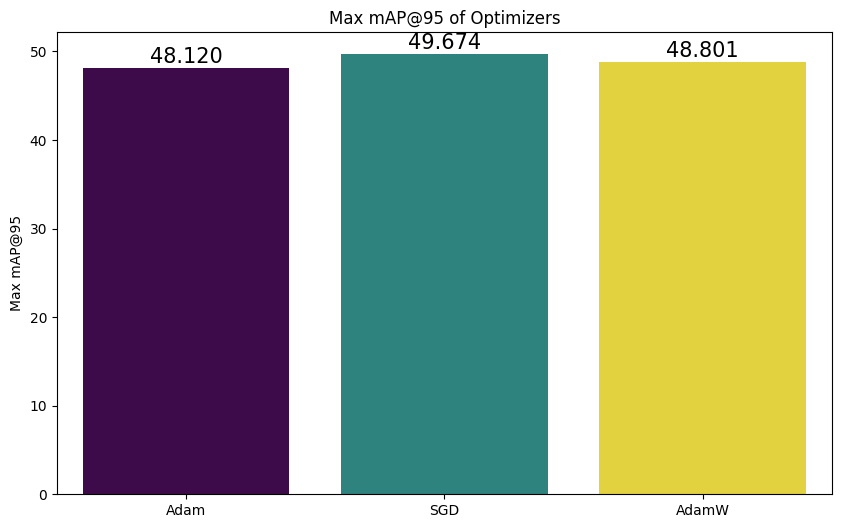

<module 'matplotlib.pyplot' from 'c:\\Users\\gange\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
x = [0,1,2]
y = [mAP_95_adam.max(), mAP_95_sgd.max(), mAP_95_adamW.max()]
legend = ['Adam','SGD','AdamW']

plot_multi_colored_bar(x,y,legend,grid=False, annotate_format= '0.3f',xlabel="",ylabel="Max mAP@95",title="Max mAP@95 of Optimizers")